In [1]:
from selenium import webdriver # 제어가 가능한 Webdriver 크롬 브라우저
from selenium.webdriver.common.by import By # select를 위한 선택자(CCS,ID,CLASS,NAME, XPATH 등)
from selenium.webdriver.common.keys import Keys # 키보드에 있는 키를 사용하기 위한 모듈
import time
from bs4 import BeautifulSoup
import requests

driver = webdriver.Chrome()

In [2]:
url = 'https://www.saramin.co.kr/zf_user/jobs/list/job-category'
driver.get(url)

## 여러 옵션 선택

In [3]:
### 경력 선택(신입)
career_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[1]/button')
career_elm.click()
career_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[1]/div/div[1]/div[1]/label')
career_elm.click()

In [4]:
### 학력 선택(무관)
edu_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[2]/button')
edu_elm.click()
edu_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[1]/div[2]/div/div[1]/div/label')
edu_elm.click()

In [7]:
### 직업 선택(IT개발데이터 전체선택)
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/ul/li[1]/button/span[1]')
job_elm.click()
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/div/div[1]/div[2]/div[1]/button[6]')
job_elm.click()
job_elm = driver.find_element(By.XPATH, '//*[@id="sp_job_category_subDepth_2"]/div[1]/label')
job_elm.click()

In [8]:
### 지역 선택(서울 전체 선택)
loc_elm = driver.find_element(By.XPATH, '//*[@id="sp_main_wrapper"]/div[2]/ul/li[2]/button')
loc_elm.click()
loc_elm = driver.find_element(By.XPATH, '//*[@id="sp_area_lastDepth_101000"]/li[1]/div/label')
loc_elm.click()

In [9]:
### 겁색하기 버튼 클릭
btn_elm = driver.find_element(By.ID, 'search_btn')
btn_elm.click()

In [ ]:
## 페이지 넘기기


In [55]:
## Chrome 드라이버 html문서 만들기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [56]:
len(soup.select('.str_tit'))

100

In [57]:
co = [i.text for i in soup.select('.str_tit')]
co

['\n                            모바일이지배하는세상(주)                        ',
 'Android App 개발 및 유지보수 신입 및 경력사원 채용공고',
 '\n                            (주)알피바이오                        ',
 '알피바이오 신입/경력 채용',
 '\n                            (주)에스이에스                        ',
 '[삼성그룹사] 삼성엔지니어링 비서행정 채용',
 '\n                            (사)보험개발원                        ',
 'IT업무/통·번역 정규직 및 계약직 채용',
 '\n                            (주)가우포토                        ',
 '촬영장비 쇼핑몰 MD, 오프라인 영업, AS수리담당 채용',
 '\n                            (주)머큐리                        ',
 '(주)머큐리 각 부문별 정규직 채용 (영업, 관리, 개발)',
 '\n                            라온시큐어(주)                        ',
 '2024 신입 공채 및 경력직 채용',
 '\n                            (주)드림어스컴퍼니                        ',
 '[SK계열사] HW 회로설계 개발자 채용(신입 가능)',
 '\n                            현대차증권(주)                        ',
 '2024년 각 분야 채용공고',
 '\n                            대한상공회의소                        ',
 '[국비지원 무료교육] 반도체 메타버스 AI 취업연계',
 '\n                        

In [62]:
## 내가 파싱해서 가져올 정보들
import re

def parser_info(soup):
    company = [re.sub(r'[\n\r()]', '', job.strip()) for i, job in enumerate(co) if i % 2 == 0]
    title = [job.strip() for i, job in enumerate(co) if i % 2 != 0]
    stacks = []
    for i in soup.select('.job_sector'):
        st= []
        for j in i.select('span'):
            st.append(j.text)
        stacks.append(st)
    loc = [i.text for i in soup.select('.work_place')]
    career = [i.text for i in soup.select('.career')]
    edu = [i.text for i in soup.select('.education')]
    last_date = [i.text for i in soup.select('.support_detail>.date')]
    input_date = [i.text for i in soup.select('.deadlines')]
    main_url = 'https://www.saramin.co.kr'
    link = [main_url + i['href'] for i in soup.select('.job_tit>.str_tit')]

    dic = {'companys' : company, 'titles' : title, 'stack' : stacks,
       'location' : loc, 'careers' : career, 'education' : edu,
       'last_date' : last_date, 'input_date' : input_date, 'links' : link}

    return pd.DataFrame(dic)

In [59]:
dic = {'companys' : company, 'titles' : title, 'stack' : stacks,
       'location' : loc, 'careers' : career, 'education' : edu,
       'last_date' : last_date, 'input_date' : input_date, 'links' : link}

In [60]:
print(len(company), len(title), len(stacks), len(loc), len(career), len(edu), len(last_date), len(input_date), len(link))

50 50 50 50 50 50 50 50 50


In [61]:
import pandas as pd
df = pd.DataFrame(dic)
df

,companys,titles,stack,location,careers,education,last_date,input_date,links
0,모바일이지배하는세상주,Android App 개발 및 유지보수 신입 및 경력사원 채용공고,"[앱개발, 프론트엔드, Android, 유지보수, Java]",서울전체 외,신입 · 경력 · 정규직,학력무관,~04.03(수),2일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,주알피바이오,알피바이오 신입/경력 채용,"[기술지원, 보안컨설팅, 유지보수, 정보보안, IT컨설팅]",서울 강남구 외,신입 · 경력 · 정규직 외,학력무관,~03.27(수),8일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,주에스이에스,[삼성그룹사] 삼성엔지니어링 비서행정 채용,"[SAP, 경리사무원, 계산서발행, 전표입력, ERP]",서울 강동구,경력무관 · 계약직 외,학력무관,D-2,3시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,사보험개발원,IT업무/통·번역 정규직 및 계약직 채용,"[보안컨설팅, 웹개발, 웹마스터, 유지보수, 정보보안]",서울 영등포구,신입 · 경력 · 정규직 외,학력무관,~03.16(토),19시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,주가우포토,"촬영장비 쇼핑몰 MD, 오프라인 영업, AS수리담당 채용","[기술지원, 영업관리, 영업MD, 영업마케팅, 영업전략]",서울 용산구 외,신입 · 경력 · 정규직,학력무관,D-4,19시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
5,주머큐리,"(주)머큐리 각 부문별 정규직 채용 (영업, 관리, 개발)","[임베디드, 정보통신, IoT, S/W, 영업관리]",서울 동작구 외,신입 · 경력 · 정규직,학력무관,D-6,18시간 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
6,라온시큐어주,2024 신입 공채 및 경력직 채용,"[기술지원, 백엔드/서버개발, 보안컨설팅, 앱개발, 웹개발]",서울 영등포구,신입 · 경력 · 정규직,학력무관,~03.17(일),6일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
7,주드림어스컴퍼니,[SK계열사] HW 회로설계 개발자 채용(신입 가능),"[임베디드, H/W, S/W, Android, C언어]",서울 서초구,신입 · 경력 · 정규직,학력무관,~03.15(금),51분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
8,현대차증권주,2024년 각 분야 채용공고,"[기술지원, 데이터분석가, 데이터엔지니어, 백엔드/서버개발, 보안컨설팅]",서울 영등포구,신입 · 경력 · 정규직 외,학력무관,D-5,11일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
9,대한상공회의소,[국비지원 무료교육] 반도체 메타버스 AI 취업연계,"[보안컨설팅, 앱개발, 웹개발, 정보보안, 빅데이터]",서울전체 외,신입 · 경력 · 교육생,학력무관,~12.31(화),21시간 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [20]:
df.to_excel('사람인_채용공고_0306.xlsx', index=False)

In [38]:
curr_url = driver.current_url
sp_url = curr_url.split('job-category?')
i = 3
page_url = sp_url[0] + f'job-category?page={i}&' + sp_url[1]

page_url

'https://www.saramin.co.kr/zf_user/jobs/list/job-category?page=3&page=2&exp_cd=1&edu_none=y&cat_mcls=2&loc_mcd=101000&search_optional_item=y&search_done=y&panel_count=y&preview=y&isAjaxRequest=0&page_count=50&sort=RL&type=job-category&is_param=1&isSearchResultEmpty=1&isSectionHome=0&searchParamCount=4&tab=job-category#searchTitle'

In [39]:
res = requests.get(page_url)
if res.status_code == 200:
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')

In [12]:
page_cnt = total_count//50 +1
print(page_cnt)
next_cnt = page_cnt // 10
print(next_cnt)
div_cnt = page_cnt % 10
print(div_cnt)

20
2
0


In [64]:
tc_elm = driver.find_element(By.XPATH, '//*[@id="content"]/div[5]/div/div[1]/span/em')
total_count = int(tc_elm.text)
page_cnt = total_count//50 +1
page_cnt

20

In [63]:
df_one=parser_info(soup)
df = parser_info(soup)

30개인 경우 elif로 나누고 총 갯수가 13개로 바꿔서 만들어줘야 함.

In [65]:
for i in range(page_cnt//10):
    if i <1:       
        print('i :',i)
        time.sleep(1)
        for j in range(2, 12):
            page_elm = driver.find_element(By.CSS_SELECTOR, f'#default_list_wrap > div > button:nth-child({j})')
            page_elm.click()
            time.sleep(2)
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')            
            new_df = parser_info(soup)
            df = pd.concat([df, new_df])
    else:
        print('i :',i)
        time.sleep(1)
        for k in range(3, 12):
            time.sleep(3)
            page_elm = driver.find_element(By.CSS_SELECTOR, f'#default_list_wrap > div > button:nth-child({k})')
            page_elm.click()
            time.sleep(2)                        
            new_df = parser_info(soup)
            df = pd.concat([df, new_df])

i : 0
i : 1


In [66]:
len(df)

1000

In [67]:
df.to_excel('사람인_채용공고_0306.xlsx', index=False)

In [35]:
from tqdm import tqdm
import re
tc_elm = driver.find_element(By.XPATH, '//*[@id="content"]/div[5]/div/div[1]/span/em')
total_count = int(tc_elm.text)
page_cnt = total_count//50 +1
page_cnt

curr_url = driver.current_url
sp_url = curr_url.split('job-category?')

for i in range(page_cnt):
    page_url = sp_url[0] + f'job-category?page={i}&' + sp_url[1]
    res = requests.get(page_url)
    if res.status_code == 200:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        company = [re.sub(r'[\n\r()]', '', job.strip()) for i, job in enumerate(co) if i % 2 == 0]
        title = [job.strip() for i, job in enumerate(co) if i % 2 != 0]
        stacks = []
        for i in soup.select('.job_sector'):
            st= []
            for j in i.select('span'):
                st.append(j.text)
            stacks.append(st)
        loc = [i.text for i in soup.select('.work_place')]
        career = [i.text for i in soup.select('.career')]
        edu = [i.text for i in soup.select('.education')]
        last_date = [i.text for i in soup.select('.support_detail>.date')]
        input_date = [i.text for i in soup.select('.deadlines')]
        main_url = 'https://www.saramin.co.kr'
        link = [main_url + i['href'] for i in soup.select('.job_tit>.str_tit')]
        dic = {'companys' : company, 'titles' : title, 'stack' : stacks,
       'location' : loc, 'careers' : career, 'education' : edu,
       'last_date' : last_date, 'input_date' : input_date, 'links' : link}
        new_df = pd.DataFrame(dic)
        df = pd.concat([df, new_df])

In [36]:
df

,companys,titles,stack,location,careers,education,last_date,input_date,links
0,주엔젤로보틱스,2024년 로봇 개발자 및 엔지니어 경력직 채용,"[기술지원, 백엔드/서버개발, 앱개발, 유지보수, 프론트엔드]",서울 성동구,신입 · 경력 · 정규직,학력무관,~03.26(화),7일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,주옵투스제약,(주)옵투스제약 신입/경력사원 채용,"[정보통신, 전산회계, 예산관리, ERP, 총무]",서울전체 외,신입 · 경력 · 정규직,학력무관,~03.21(목),18시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,주리더스시스템즈,엔지니어 모집 [24년 초 본사 하남 이전],"[기술지원, 네트워크, VDI, Linux, 유지보수]",서울전체 외,경력무관 · 정규직,학력무관,~04.08(월),15분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,주뷰온,C# C++ 개발자 (시스템/장비/자동제어/머신비전),"[S/W, C#, C++, OpenCV, 기술엔지니어]",서울 금천구,신입 · 경력 · 정규직,학력무관,~03.30(토),22분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,주동곡기정,[(주)동곡기정] 각 부문 신입 및 경력직 채용,"[기술지원, 유지보수, Excel, PowerPoint, 영업관리]",서울전체 외,신입 · 경력 · 정규직,학력무관,D-5,8일 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
5,주밸류플러스,"밸류플러스, 밸류플러스테크놀러지, 밸류플러스 베트남 각 부문별 인재모집","[S/W, C#, Linux, MySQL, OracleDB]",서울전체 외,신입 · 경력 · 정규직,학력무관,~04.04(목),23시간 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
6,주트루빈스,"2배씩 성장, 업계 최대 대우(PD/작가/AE/디자이너/경영지원)","[데이터분석가, 데이터엔지니어, 앱개발, 웹개발, 퍼블리셔]",서울전체 외,경력무관 · 정규직,학력무관,~03.18(월),19시간 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...
7,메가스터디교육주,공무원 웹개발자 채용,"[기술지원, 백엔드/서버개발, 웹개발, 유지보수, 프론트엔드]",서울 서초구,신입 · 경력 · 정규직,학력무관,~03.17(일),17시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
8,서민금융진흥원,2024년도 일반직(신입) 채용,"[정보보안, 전산회계, 사무직, 사무보조]",서울 중구,경력무관,학력무관,~03.14(목),23시간 전 등록,https://www.saramin.co.kr/zf_user/jobs/relay/v...
9,재한국보건의료정보원,2024년 제1차 직원채용,"[정보보안, 비서, 사무행정, 기획, 운전]",서울 중구 외,경력무관 · 계약직,학력무관,~03.15(금),25분 전 수정,https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [69]:
df['careers'].str.contains('정규직')

0      True
1      True
2     False
3      True
4      True
      ...  
45     True
46     True
47     True
48     True
49     True
Name: careers, Length: 1000, dtype: bool

In [71]:
total_stack = []
for tag in df['stack']:
    for st in tag:
        total_stack.append(st)

len(total_stack)

4590

In [136]:
## 불필요한 단어들 제거
total_word = []
stop_word=['유지보수', '기술지원', '인프라', '방화벽', '보안컨설팅', '보안관제']
for w in total_stack:
    if w not in stop_word:
        total_word.append(w)

In [137]:
from collections import Counter
Counter(total_stack)

most_50 = Counter(total_word).most_common(100)
most_50

[('백엔드/서버개발', 218),
 ('웹개발', 205),
 ('네트워크', 164),
 ('정보보안', 151),
 ('솔루션', 138),
 ('앱개발', 135),
 ('SE(시스템엔지니어)', 106),
 ('프론트엔드', 77),
 ('Java', 77),
 ('H/W', 74),
 ('S/W', 69),
 ('QA/테스터', 66),
 ('IT컨설팅', 62),
 ('클라우드', 58),
 ('정보통신', 56),
 ('Linux', 47),
 ('C++', 45),
 ('퍼블리셔', 42),
 ('Android', 39),
 ('데이터엔지니어', 39),
 ('C#', 37),
 ('데이터분석가', 36),
 ('Windows', 35),
 ('게임개발', 34),
 ('SI개발', 34),
 ('GM(게임운영)', 31),
 ('웹마스터', 30),
 ('빅데이터', 27),
 ('AI(인공지능)', 27),
 ('DBMS', 27),
 ('AWS', 25),
 ('고객관리', 24),
 ('사이트관리', 23),
 ('API', 22),
 ('콘텐츠관리', 22),
 ('CISO', 22),
 ('CSS', 21),
 ('HTML5', 20),
 ('ERP', 19),
 ('딥러닝', 19),
 ('DBA', 19),
 ('영상처리', 18),
 ('HTML', 18),
 ('ASP', 18),
 ('MySQL', 17),
 ('Javascript', 17),
 ('VR(가상현실)', 17),
 ('RDBMS', 16),
 ('jQuery', 16),
 ('취약점진단', 15),
 ('JSP', 15),
 ('메타버스', 15),
 ('머신러닝', 14),
 ('iOS', 14),
 ('모의해킹', 14),
 ('스포츠강사', 14),
 ('PM(프로젝트매니저)', 14),
 ('PHP', 14),
 ('Git', 14),
 ('Flutter', 14),
 ('서비스기획', 14),
 ('MSSQL', 14),
 ('Python', 14),

In [77]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [138]:
from PIL import Image
import numpy as np

im = Image.open('sherlock.png')
mask_arr = np.array(im)

In [139]:
wc = WordCloud(font_path = 'C:/windows/fonts/malgun.ttf',
              background_color='black',
              colormap='spring',
              relative_scaling=0.1,
              mask = mask_arr)

In [140]:
cloud = wc.generate_from_frequencies(dict(Counter(total_word)))

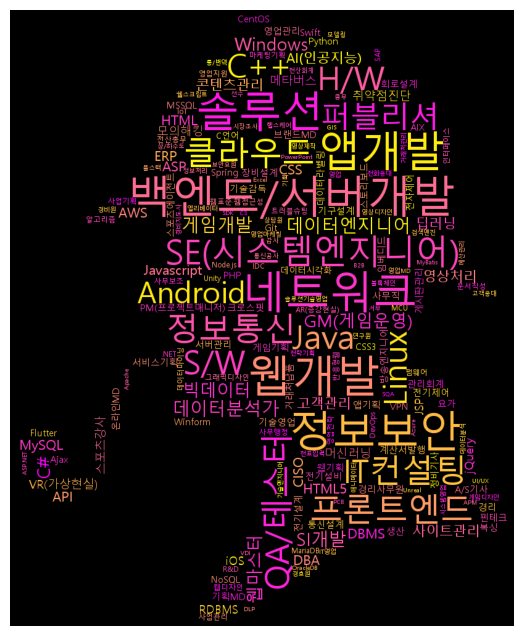

In [141]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud) # 외부 사진을 시각화할 때 사용
plt.show()